<a href="https://colab.research.google.com/github/UnplugCharger/Week-13/blob/master/Week_12_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **RESEARCH QUESTION**

 A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads.

2. **Metrics Of Success**

 Perform a univariate and Bivariate analysis on the provided dataset using R language to understand factors affecting the click through rate of an ad

3. **Experimental Design**

 a. Load the dataset 

 b. Find anomalies , outlies and deal with missing data in the dataset

 c. Perform  univariate and bivariate analysis

 d. Conclusion and Recomendation

4. **Understanding the context**

 With the growing internet coverage paid advertisement has proven to be the backbone of most bussinesses. There are alot of online advertisement platforms. The biggest ones include all facebook products , twitter , google and bing

 An online advertisement should be crafted well to lure someone who is browsing to click on the ad and should be targeted so as to reach the required audience.In this study I am goint to analyse the data and come with a proper targeting recomendation to help increase the ROS of  future campaigns


5. **Dataset Validity**

 The dataset to be used in this study is valid and can be found on kaggle https://www.kaggle.com/homelesssandwich/analysis-of-advertising-data

 The dataset columns are as follows 

 1.Daily Time Spent on a Site -Time spent by the user on a site in minutes.

 2.Age- Customer's age in terms of years.

 3.Area Income- Average income of geographical area of consumer.

 4.Daily Internet Usage -Average minutes in a day consumer is on the internet.

 5.Ad Topic Line- Headline of the advertisement.

 6.City -City of the consumer.

 7.Male -Whether or not a consumer was male.

 8.Country- Country of the consumer.

 9.Timestamp -Time at which user clicked on an Ad or the closed window.

 10.Clicked on Ad 0 or 1 is indicated clicking on an Ad.

#Loading Libraries and Previewing the Dataset

In [1]:
install.packages('data.table')
install.packages("vioplot")
install.packages('readr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sm’, ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
require(data.table)

Loading required package: data.table



In [5]:
#Loading dataset 

ad_df <- fread('/advertising.csv')

In [6]:
head(ad_df)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [7]:
#Getting the dimentions of our dataset 
dim(ad_df)

[1] 1000   10

Our dataset has 1000 rows and 10 columns 
This is a small dataset ... in the next cell we will try and see the summary of our dataset 

In [8]:
summary(ad_df)

 Daily Time Spent on Site      Age         Area Income    Daily Internet Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad Topic Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

from the above we see that 

1. The age distribution of the targeted audience was from 19 on the lower side and 61 on the highest side

2. From the audience the daily time spent on the site varied  from 32.60  and the highest time spent on the site was 91.43

3. The internet usage daily was 104.8 on the lower side and 270.0 on the highest side 


##Data Cleaning 

In [9]:
#checking for duplicates from the data 

dup_df<-ad_df[duplicated(ad_df),]
dup_df

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>


The above dataset is empty because there are no duplicates in the dataset we are using for this study

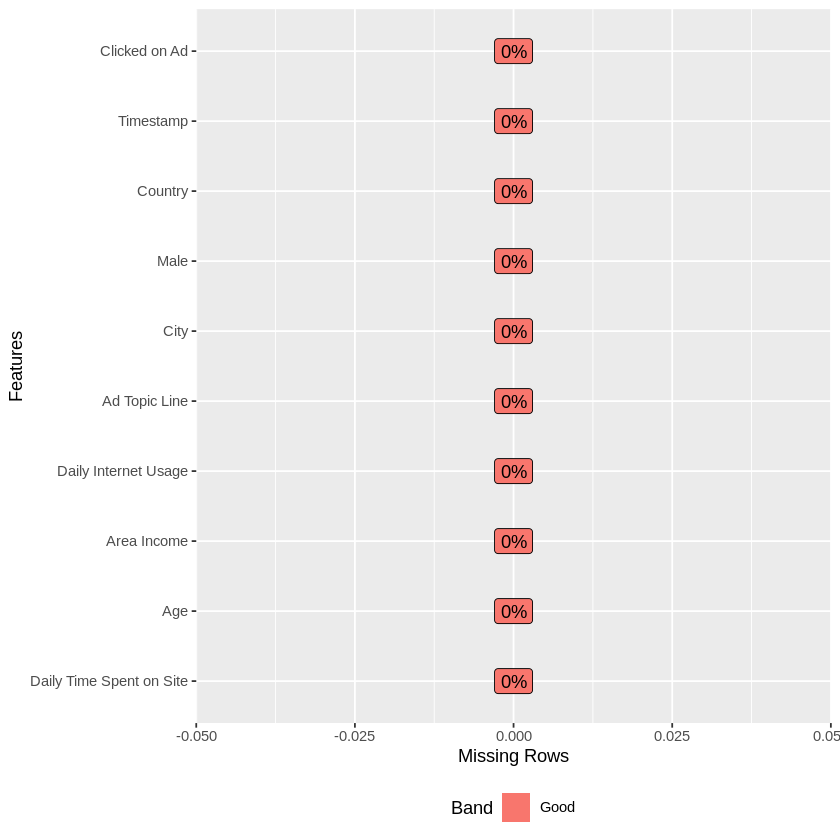

In [12]:
plot_missing(ad_df)

In [13]:
#cheking for null value in the dataset

null_value <- is.null(ad_df)
null_value

[1] FALSE

In [14]:
colSums(is.na(ad_df))

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

The above two cells shows that our dataset is void of null and na values 

##Cheking for Anomalies and Univariate analysis

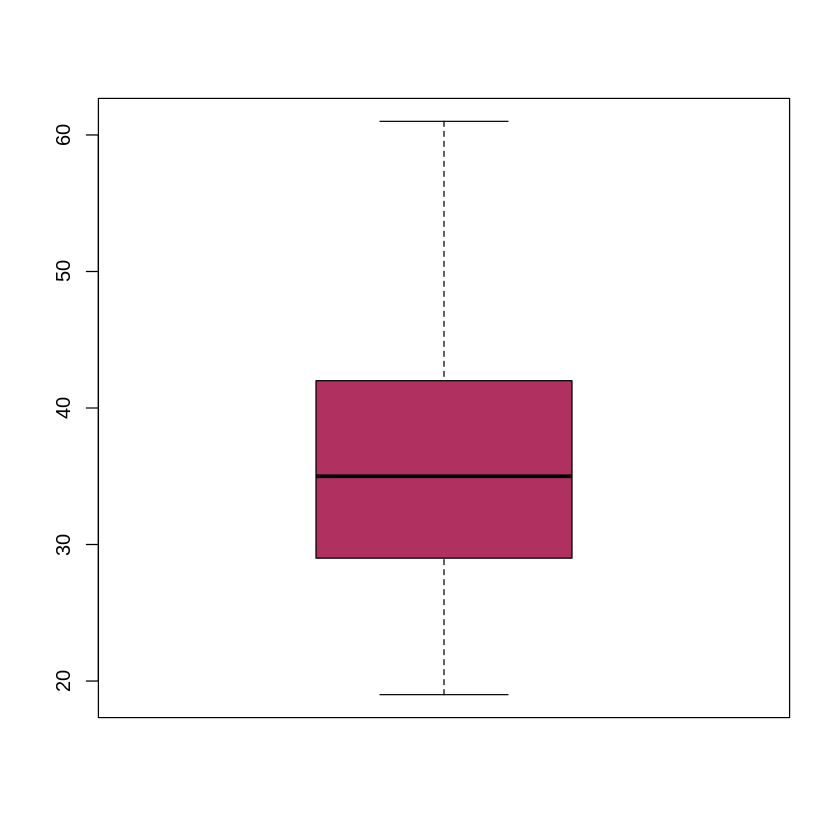

In [15]:
boxplot(ad_df$Age,col='maroon')

The age distribution from our dataset is within bounds and there are no abnormal values

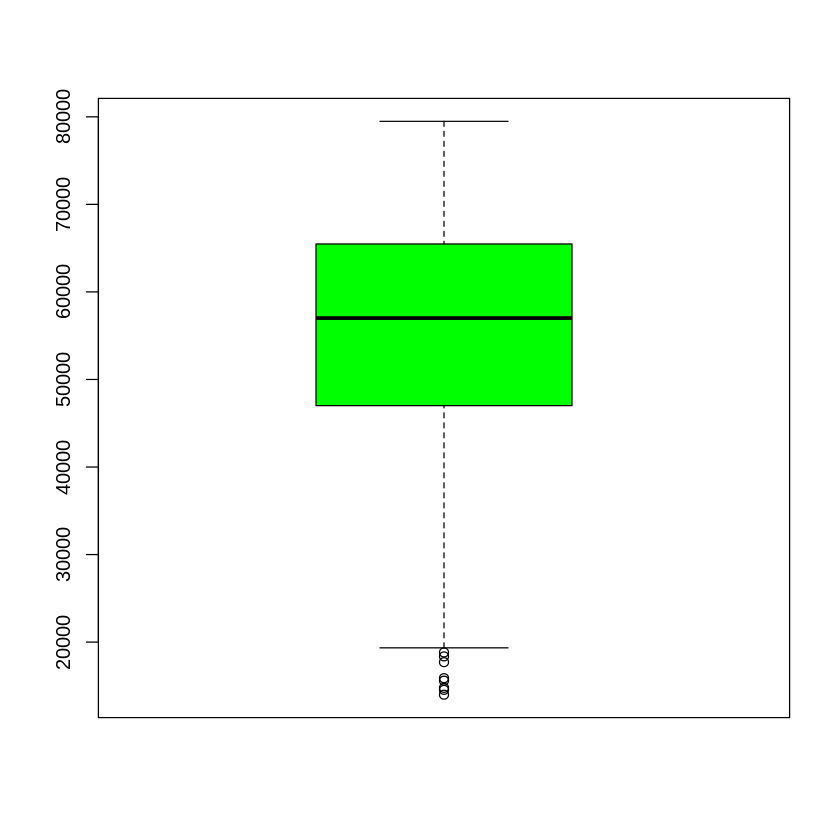

In [16]:
boxplot(ad_df$`Area Income`,col='green')

There are a few outliers in this column 

I will check those values in the next cell

In [17]:
boxplot.stats(ad_df$`Area Income`)$out

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

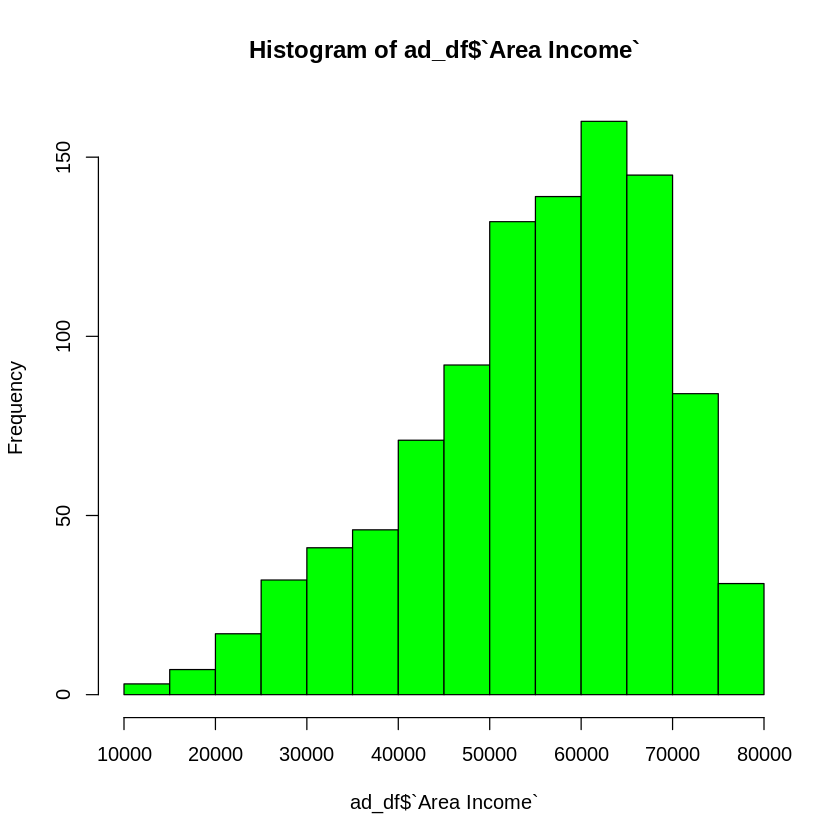

In [18]:
hist(ad_df$`Area Income`,col='green')

The above datapoints are outliers in the distribution. We are not going to delete them because they are not outragious and they can be essential when it comes to ad click through rate  because wealthy neighbourhoods have more engaged shoppers and this is a parameter that is set during the ad creative placement. So we will let the outliers stay put


We also see that our data is skewed to the left 

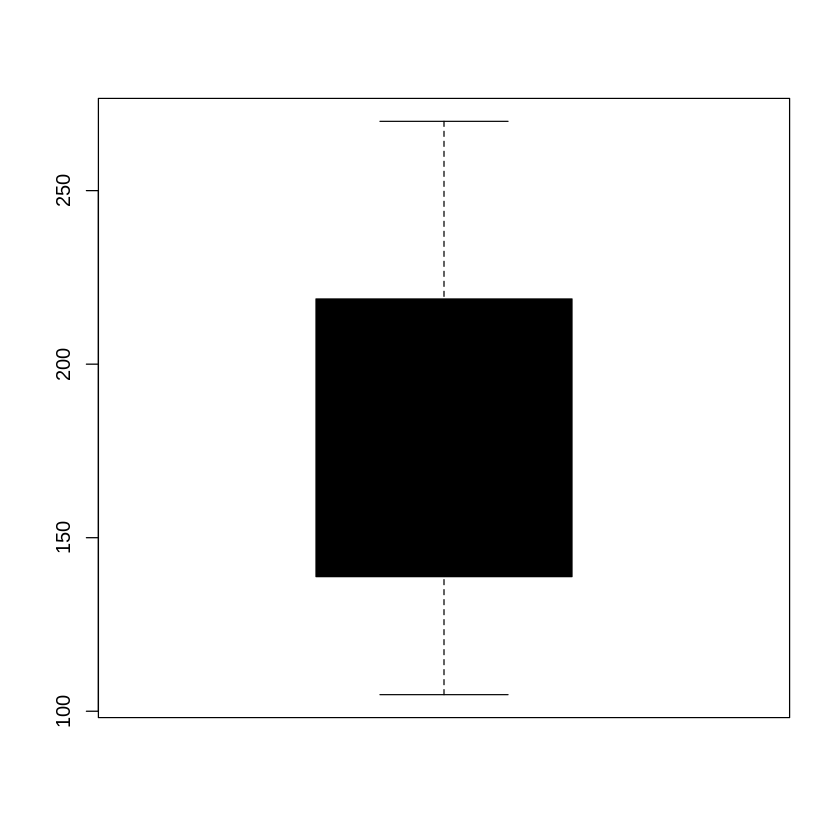

In [19]:
boxplot(ad_df$`Daily Internet Usage`,col = 'black')

There are no data points outside our distribution

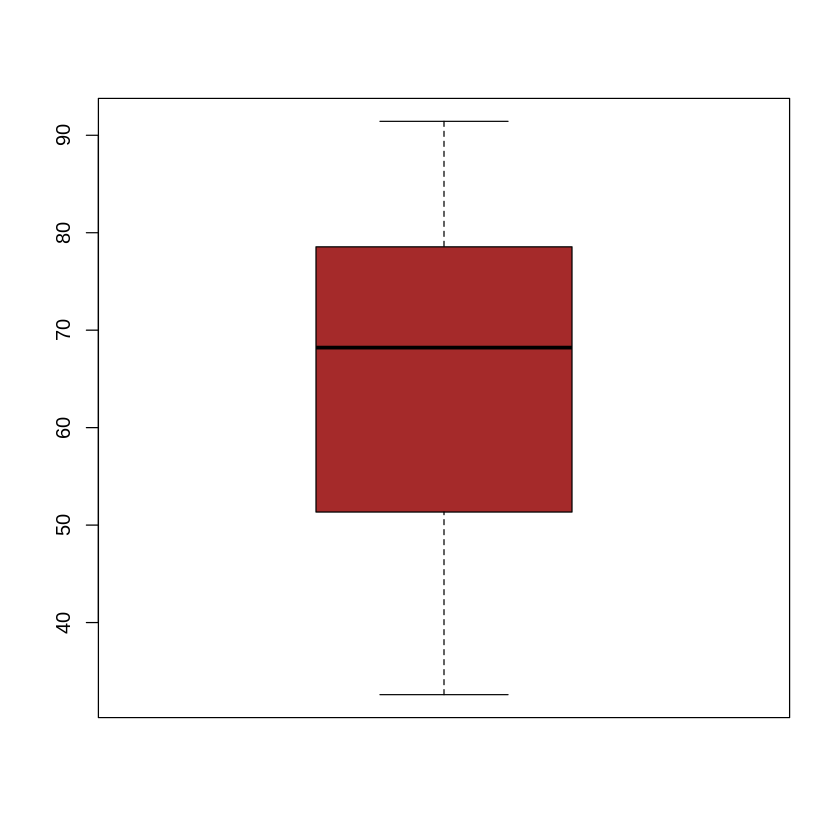

In [20]:
boxplot(ad_df$`Daily Time Spent on Site`,col = 'brown')

There are no abnomalities or outliers in this column

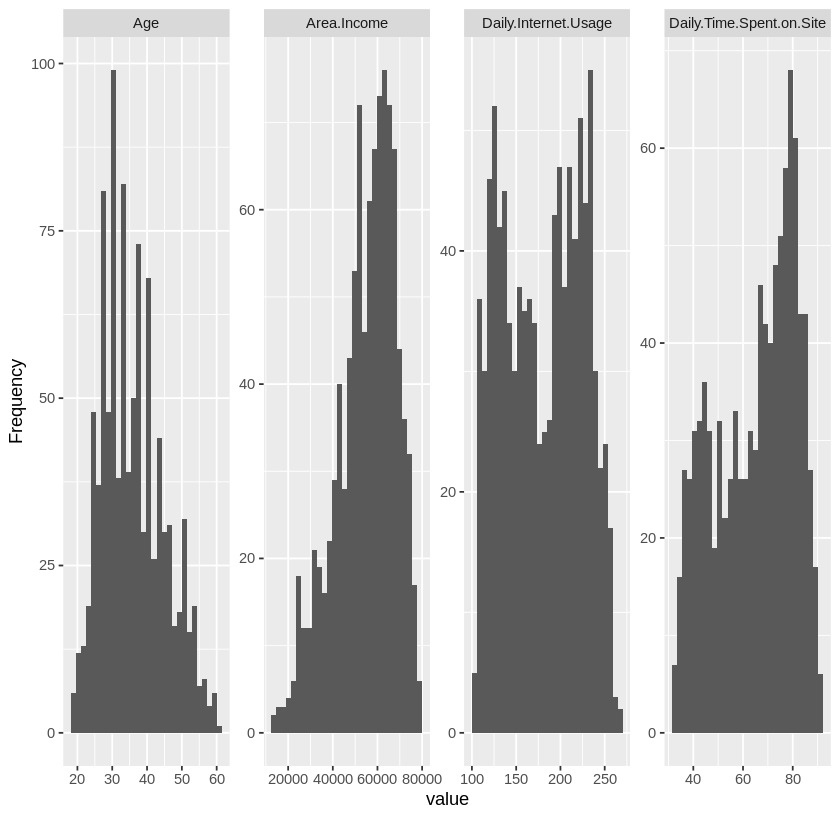

In [21]:
plot_histogram(ad_df)

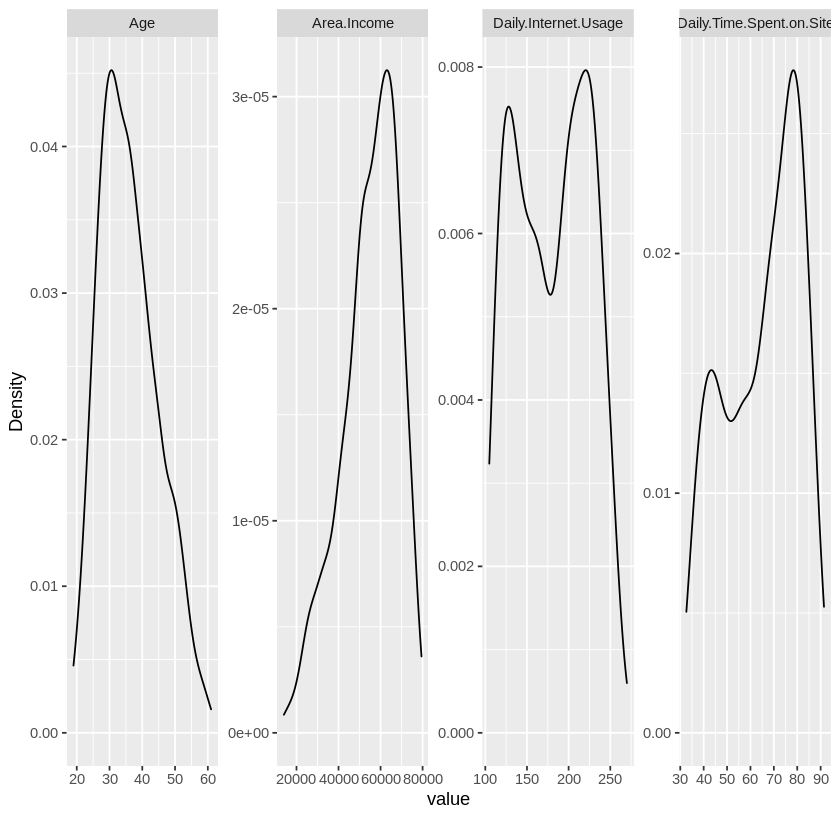

In [22]:
plot_density(ad_df)

#Bivariate Analysis

Since the study is aimed at optimising and ad ... we are goingto do a bivariate analysis to see how different columns relateto our target column which is the click through rate 

In [ ]:
#install.packages("ggplot2") # choose your favorite mirror

#require(ggplot2)

In [11]:
install.packages('DataExplorer') 
library(DataExplorer)
require(DataExplorer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’




In [23]:
nums <- unlist(lapply(ad_df, is.numeric)) 

In [24]:
data_num <- ad_df[ , ..nums]                        # Subset numeric columns of data
head(data_num)                                            # Print subset to RStudio console

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<int>,<int>
68.95,35,61833.90,256.09,0,0
80.23,31,68441.85,193.77,1,0
69.47,26,59785.94,236.50,0,0
74.15,29,54806.18,245.89,1,0
68.37,35,73889.99,225.58,0,0
59.99,23,59761.56,226.74,1,0


In [25]:
by(ad_df$Age,ad_df$`Clicked on Ad`,summary)

ad_df$`Clicked on Ad`: 0
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   27.00   31.00   31.68   36.00   53.00 
------------------------------------------------------------ 
ad_df$`Clicked on Ad`: 1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   34.00   40.00   40.33   47.00   61.00 

From the above we can see that the distribution of people who clicked on the ad is larger than those that didnt 

the first quatile for the peoplewho clicked on the ad is wider than the peorple who didnt

In [26]:
by(ad_df$Age,ad_df$`Clicked on Ad`,mean)

ad_df$`Clicked on Ad`: 0
[1] 31.684
------------------------------------------------------------ 
ad_df$`Clicked on Ad`: 1
[1] 40.334

The mean age of the people who clicked throughthe ad is 40.33 while the mean age of people who didnt click on the ad is 31.687


This means that the ad creatives that were drafted mostly appealed to the older population than the younger population  and when targeting is done more focus should be put to the older population. If  during targeting maybe the younger population can be removed from the demographics.

Since the mean age is 40.334 we can target from the first quatre of that during ad placements

In [27]:
by(ad_df$Age,ad_df$`Clicked on Ad`,median)

ad_df$`Clicked on Ad`: 0
[1] 31
------------------------------------------------------------ 
ad_df$`Clicked on Ad`: 1
[1] 40

The median age is  again around 40 .
So during the ad placements  the focus on the age should be around the lower quatre of 40  and the upper quatre  i.e targeting should be done with that concideration 

40-19=21

21x0.25=5.25

the lower age limit for the ad should therefore be 19+5.25=24.25~25

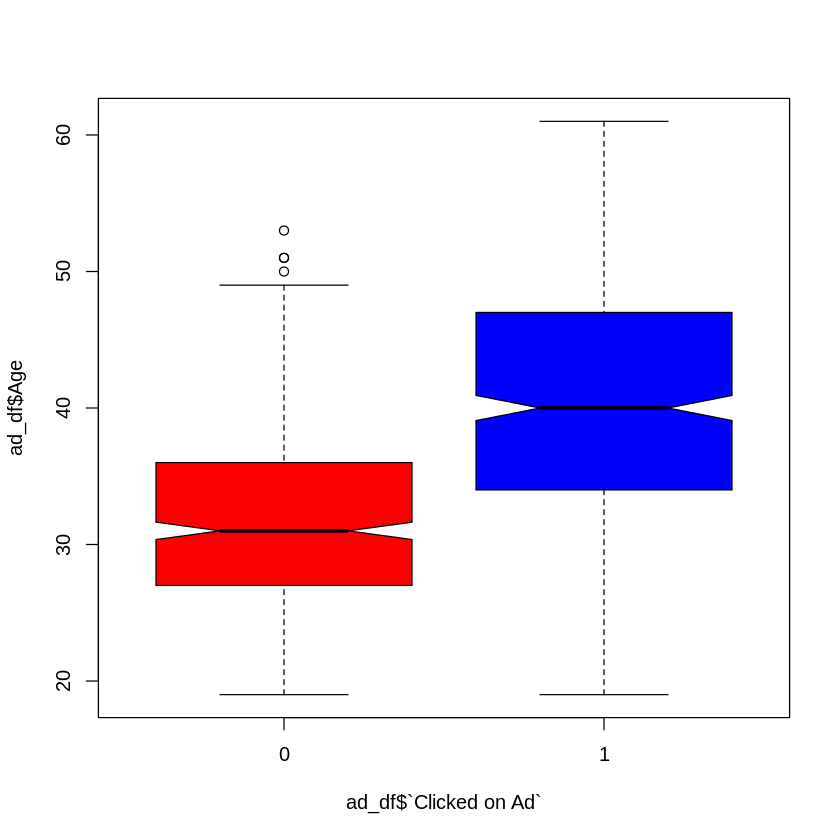

In [28]:
boxplot(ad_df$Age~ad_df$`Clicked on Ad`,col = c('red','blue'),notch = TRUE)

The above is a visualisation of the statements made above it

In [29]:
by(ad_df$`Daily Internet Usage`,ad_df$`Clicked on Ad`,summary)

ad_df$`Clicked on Ad`: 0
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  146.2   198.5   216.4   214.5   231.9   267.0 
------------------------------------------------------------ 
ad_df$`Clicked on Ad`: 1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.8   123.6   138.8   145.5   161.2   270.0 

From the above we can see that people who spend more time on the site are likely not to click on the ad 

so we could decrease the amount of content on the landing page or the product page so that we reduce this number or make our call to action button bigger or make it twinkle so as to make a customer click on it faster 


I will make a visual plot of the same 

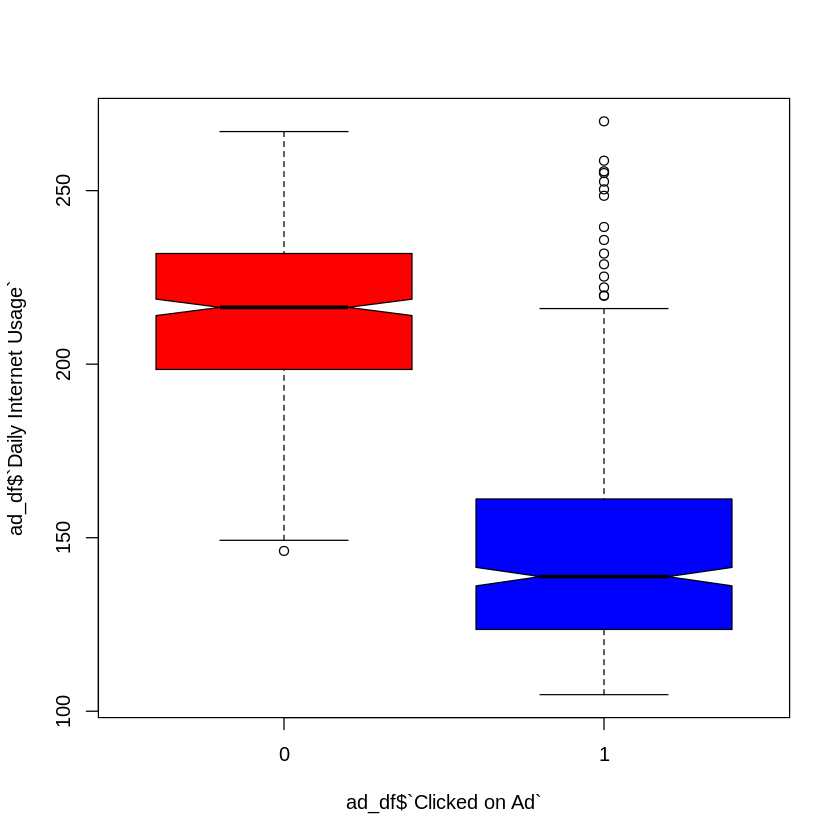

In [30]:
boxplot(ad_df$`Daily Internet Usage`~ad_df$`Clicked on Ad`,col = c('red','blue'),notch = TRUE)

In [31]:
by(ad_df$`Area Income`,ad_df$`Clicked on Ad`,summary)

ad_df$`Clicked on Ad`: 0
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33239   55607   62275   61386   67519   79485 
------------------------------------------------------------ 
ad_df$`Clicked on Ad`: 1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13996   39107   49417   48614   59241   78521 

People in areas with higher income were not likely to click the add .

So during ad placement we could not target such places 

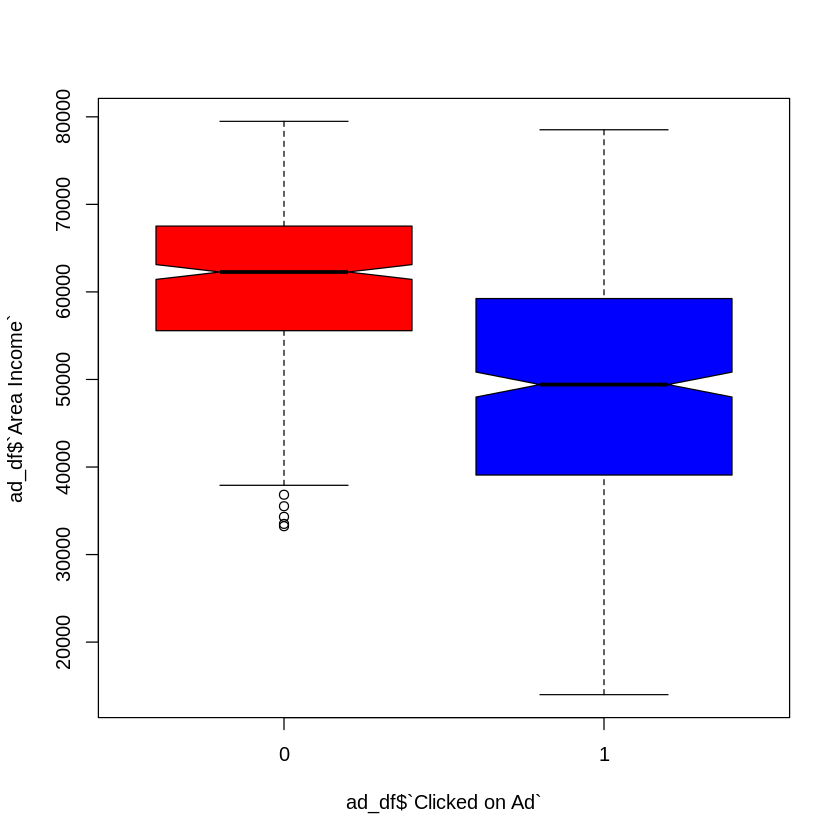

In [32]:
boxplot(ad_df$`Area Income`~ad_df$`Clicked on Ad`,col = c('red','blue'),notch = TRUE)

In [33]:
by(ad_df$`Daily Time Spent on Site`,ad_df$`Clicked on Ad`,summary)

ad_df$`Clicked on Ad`: 0
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  48.22   72.08   77.65   76.85   82.07   91.43 
------------------------------------------------------------ 
ad_df$`Clicked on Ad`: 1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.60   42.84   51.53   53.15   62.08   91.37 

Again we see that using the minimum  and the lower quantiles , the people who spent less  time on the site were likely to click through the ad than those who spent more time 

To get people to spend less time on the site and click through the ad again w could decrease the content in that particular web page and increase the size of the call to action button, or make the call to action button move twinkle or shake so as to grabb their attention.

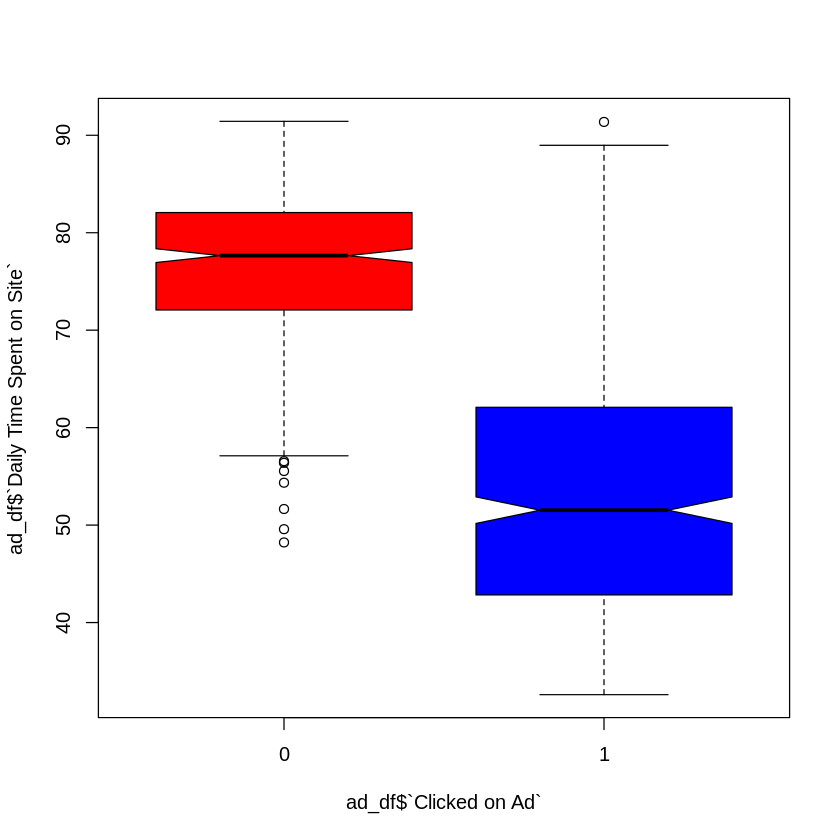

In [34]:
boxplot(ad_df$`Daily Time Spent on Site`~ad_df$`Clicked on Ad`,col = c('red','blue'),notch = TRUE)

In [35]:
by(ad_df$Male,ad_df$`Clicked on Ad`,summary)

ad_df$`Clicked on Ad`: 0
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.5     0.5     1.0     1.0 
------------------------------------------------------------ 
ad_df$`Clicked on Ad`: 1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   0.462   1.000   1.000 

In [36]:
by(ad_df$Age,ad_df$`Ad Topic Line` ,summary)

ad_df$`Ad Topic Line`: Adaptive 24hour Graphic Interface
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     33      33      33      33      33      33 
------------------------------------------------------------ 
ad_df$`Ad Topic Line`: Adaptive asynchronous attitude
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     36      36      36      36      36      36 
------------------------------------------------------------ 
ad_df$`Ad Topic Line`: Adaptive context-sensitive application
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     31      31      31      31      31      31 
------------------------------------------------------------ 
ad_df$`Ad Topic Line`: Adaptive contextually-based methodology
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     44      44      44      44      44      44 
------------------------------------------------------------ 
ad_df$`Ad Topic Line`: Adaptive demand-driven knowledgebase
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     38      38

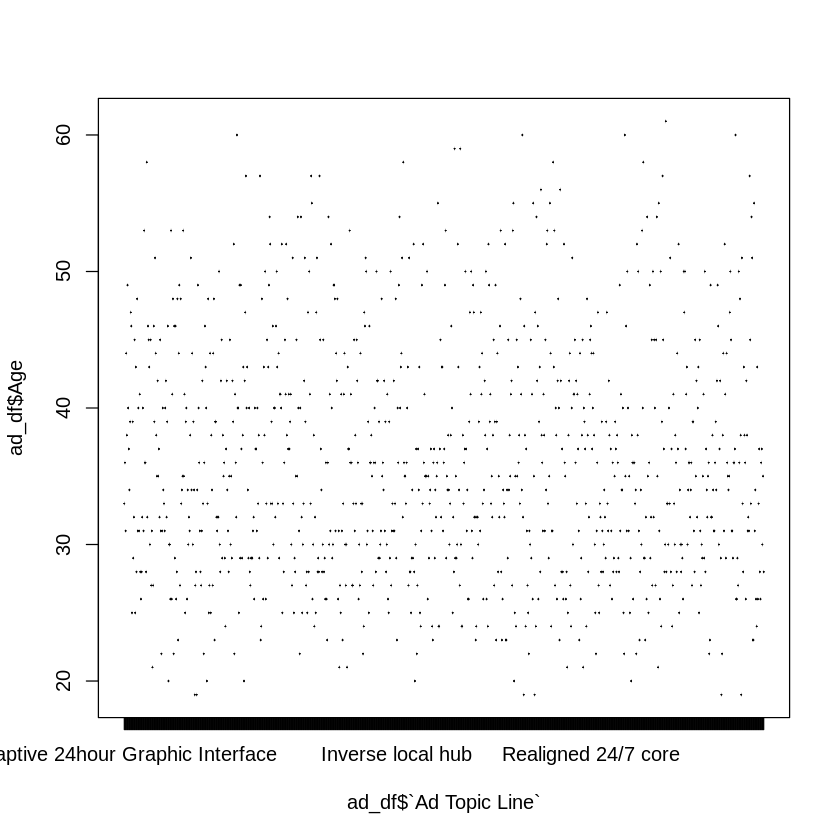

In [37]:
boxplot(ad_df$Age~ad_df$`Ad Topic Line` ,col = c('red','blue'),notch = TRUE)

The visualisation is not pretty.


But the above summary tells us that the age below 28 were not particular with any ad topic ad line.

In [ ]:
by(ad_df$`Clicked on Ad`,ad_df$`Ad Topic Line`,summary)

From the above we can see that some of the ad topic lines are not getting clicked at 

Those ad lines include 

1. Adaptive 24hour Graphic Interface

2. Advanced 5thgeneration capability

3. Advanced didactic conglomeration

4. Advanced exuding conglomeration

5. Advanced full-range migration

6. Advanced heuristic firmware

7. Advanced local task-force

8. Advanced modular Local Area Network

9. Ameliorated actuating workforce

10. Ameliorated contextually-based collaboration

11. Ameliorated exuding encryption

12. De-engineered intangible flexibility


The above is just but a few  but the tag lines that are not being clicked  should be removed

In [38]:
by(ad_df$`Clicked on Ad`,ad_df$Country,summary)

ad_df$Country: Afghanistan
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   0.625   1.000   1.000 
------------------------------------------------------------ 
ad_df$Country: Albania
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.5714  1.0000  1.0000 
------------------------------------------------------------ 
ad_df$Country: Algeria
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.5     0.5     1.0     1.0 
------------------------------------------------------------ 
ad_df$Country: American Samoa
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     1.0     0.6     1.0     1.0 
------------------------------------------------------------ 
ad_df$Country: Andorra
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 
------------------------------------------------------------ 
ad_df$Country: Angola
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   

There are 22 countries where there was no ad clicked.These countries should be removed from the target demographics because maybe ads are being displayes there , money is being spent on the ad placements but nobody in those countries are intrested and nobody is clicking on the ads 

In [39]:
by(ad_df$`Clicked on Ad`,ad_df$City,summary)

ad_df$City: Adamsbury
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 
------------------------------------------------------------ 
ad_df$City: Adamside
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 
------------------------------------------------------------ 
ad_df$City: Adamsstad
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 
------------------------------------------------------------ 
ad_df$City: Alanview
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 
------------------------------------------------------------ 
ad_df$City: Alexanderfurt
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 
------------------------------------------------------------ 
ad_df$City: Alexanderview
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1      

There are so any cities where there was no click  so  we could drop the countries with no clicks and if we still have no click cities we should drop them too

1. From the above analysis we  have found out that the click  through rate is affected by age so older people clicked on the ad more often than the younger people 

 From that  I can recomend that the campaign be targeted towards older people 

2. The less time someone spends on the internet and on the site the more likely  they are to click through the ad

 From that I could recomend that the site be customised in a way that people dont spend much time on it 

 i.e The call to action button can be made bigger, it can be made to twinkle or shake to grabb attention quicker 

 alternatively the content on the site could be summarised so that any visitor does not spend so much time reading through before they can reach the actual place to click the ad

3. Some tag lines are not being clicked so they should be deleted or re-written 
 The tag lines with more clicks should have their budgets increased so that we have moreclicks and if this was a conversion campaign , more clicks relates tomore sales 

 The unclicked tag lines should just be deleted and their budget cut , or reduced because they are spending money but not delivering

4. From the above we can also see that the least age that identifies with any of the above tag line was 28 yet our dataset had ages from 19 . So for the click through rate to increase . Tag lines can be crafted to apeal to this younger demography or the targeting can be done so that the least age targeted in the campaighn can be 28

5. There are 22 countries where the ad was ran and did not get any click. We could remove those 22 countries from our target countries and target the countries where the click through rate was high 

6. There are so many , more than 100 no click cities . We should look into these drop the no click  countries and if we still have no click cities we should drop them too and not spend any money advertising in these cities

Most catergorical variables had so many entries that a simple bivariate analysis using basic R packages could not give insights from them 

Maybe if the analysis was done on tableau or PowerBI then insights would have been easy to extract from these large catergories

# RANDOM FOREST CLASSIFICATION USING R

### Preparing data for the Random forest classifier

In [132]:
ad_df$Month <- format(as.Date(ad_df$Timestamp),'%m')

In [133]:
ad_df <- transform(
  ad_df,
  Area_Income=as.integer(Area_Income),
  Male=as.factor(Male),
  Month=as.factor(Month),
  Year=as.factor(Year),
  Clicked_on_Ad=as.factor(Clicked_on_Ad),
  Ad_Topic_Line=as.factor(Ad_Topic_Line),
  Hour = as.factor(Hour)
)

In [134]:
head(ad_df)

Daily_site_time,Age,Area_Income,Daily_net_usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad,Month,Year,Hour
<dbl>,<int>,<int>,<dbl>,<fct>,<chr>,<fct>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
68.95,35,61833,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,03,2016,00
80.23,31,68441,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,04,2016,00
69.47,26,59785,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,03,2016,00
74.15,29,54806,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,01,2016,00
68.37,35,73889,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,06,2016,00
59.99,23,59761,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,05,2016,00


I am going to remove all the catergories with many entries because they dont really help much in the prediction 

In [137]:
df <-subset(ad_df,select = -Country)

In [139]:
df <-subset(df,select = -Hour)

In [140]:
df <-subset(df,select = -Year)

In [142]:
df <-subset(df,select = -Timestamp)

In [143]:
df <-subset(df,select = -Ad_Topic_Line)

In [144]:
head(df)

Daily_site_time,Age,Area_Income,Daily_net_usage,City,Male,Clicked_on_Ad,Month
<dbl>,<int>,<int>,<dbl>,<chr>,<fct>,<fct>,<fct>
68.95,35,61833,256.09,Wrightburgh,0,0,03
80.23,31,68441,193.77,West Jodi,1,0,04
69.47,26,59785,236.50,Davidton,0,0,03
74.15,29,54806,245.89,West Terrifurt,1,0,01
68.37,35,73889,225.58,South Manuel,0,0,06
59.99,23,59761,226.74,Jamieberg,1,0,05


In [40]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [129]:
# Splitting the dataset into train and validation set then previewing
# Split into Train and Validation sets
# Training Set : Validation Set = 70 : 30 (random)
set.seed(100)
train <- sample(nrow(df), 0.7*nrow(df), replace = FALSE)
TrainSet <- df[train,]
ValidSet <- df[-train,]
summary(TrainSet)
summary(ValidSet)


 Daily_site_time      Age         Area_Income    Daily_net_usage Male   
 Min.   :32.60   Min.   :19.00   Min.   :13996   Min.   :104.8   0:360  
 1st Qu.:50.85   1st Qu.:29.00   1st Qu.:47494   1st Qu.:140.0   1:340  
 Median :67.57   Median :35.00   Median :57424   Median :182.7          
 Mean   :64.63   Mean   :36.13   Mean   :55290   Mean   :180.2          
 3rd Qu.:78.31   3rd Qu.:42.00   3rd Qu.:65840   3rd Qu.:219.1          
 Max.   :91.37   Max.   :60.00   Max.   :79332   Max.   :270.0          
                                                                        
 Clicked_on_Ad Month   
 0:347         01:107  
 1:353         02:125  
               03:103  
               04: 98  
               05:104  
               06: 92  
               07: 71  

 Daily_site_time      Age         Area_Income    Daily_net_usage Male   
 Min.   :32.84   Min.   :19.00   Min.   :18819   Min.   :105.0   0:159  
 1st Qu.:52.02   1st Qu.:29.00   1st Qu.:44444   1st Qu.:135.5   1:141  
 Median :70.25   Median :34.00   Median :56838   Median :183.6          
 Mean   :65.86   Mean   :35.73   Mean   :54321   Mean   :179.5          
 3rd Qu.:78.69   3rd Qu.:42.00   3rd Qu.:64046   3rd Qu.:217.3          
 Max.   :91.43   Max.   :61.00   Max.   :79484   Max.   :261.0          
                                                                        
 Clicked_on_Ad Month  
 0:153         01:40  
 1:147         02:35  
               03:53  
               04:49  
               05:43  
               06:50  
               07:30  

Now, we will create a Random Forest model with default parameters and then we will fine tune the model by changing ‘mtry’. We can tune the random forest model by changing the number of trees (ntree) and the number of variables randomly sampled at each stage (mtry). According to Random Forest package description:

Ntree: Number of trees to grow. This should not be set to too small a number, to ensure that every input row gets predicted at least a few times.

Mtry: Number of variables randomly sampled as candidates at each split. Note that the default values are different for classification (sqrt(p) where p is number of variables in x) and regression (p/3)

In [130]:
# Create a Random Forest model with default parameters
model1 <- randomForest(Clicked_on_Ad ~ ., data = TrainSet, importance = TRUE)
model1


Call:
 randomForest(formula = Clicked_on_Ad ~ ., data = TrainSet, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 3.43%
Confusion matrix:
    0   1 class.error
0 337  10  0.02881844
1  14 339  0.03966006

In [131]:
model1


Call:
 randomForest(formula = Clicked_on_Ad ~ ., data = TrainSet, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 3.43%
Confusion matrix:
    0   1 class.error
0 337  10  0.02881844
1  14 339  0.03966006

By default, number of trees is 500 and number of variables tried at each split is 2 in this case. Error rate is 3.43%.

In [158]:
# Fine tuning parameters of Random Forest model
model2 <- randomForest(Clicked_on_Ad ~ ., data = TrainSet, ntree = 500, mtry = 2, importance = TRUE)
model2


Call:
 randomForest(formula = Clicked_on_Ad ~ ., data = TrainSet, ntree = 500,      mtry = 2, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 3.29%
Confusion matrix:
    0   1 class.error
0 339   8  0.02305476
1  15 338  0.04249292

When we have increased the mtry to 6 from 2, error rate has reduced from 3.43% to 3.29%. We will now predict on the train dataset first and then predict on validation dataset.

In [159]:
# Predicting on train set
predTrain <- predict(model2, TrainSet, type = "class")
# Checking classification accuracy
table(predTrain, TrainSet$Clicked_on_Ad)  

         
predTrain   0   1
        0 347   0
        1   0 353

In [161]:
# Predicting on Validation set
predValid <- predict(model2, ValidSet, type = "class")
# Checking classification accuracy
mean(predValid == ValidSet$Clicked_on_Ad)                    
table(predValid,ValidSet$Clicked_on_Ad)

[1] 0.9566667

         
predValid   0   1
        0 147   7
        1   6 140

In case of prediction on train dataset, there is zero misclassification; however, in the case of validation dataset, 13 data points are misclassified and accuracy is 95.66%. We can also use function to check important variables. The below functions show the drop in mean accuracy for each of the variables

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
Daily_site_time,80.5453023,49.417012,89.129322,123.267015
Age,30.0608372,11.216569,29.632605,33.939611
Area_Income,25.6508439,8.924974,25.855970,31.925438
Daily_net_usage,77.1023731,55.729836,87.826800,151.220814
Male,0.4050549,1.808845,1.578049,1.811086
Month,-2.2570661,1.102468,-1.205211,7.115861


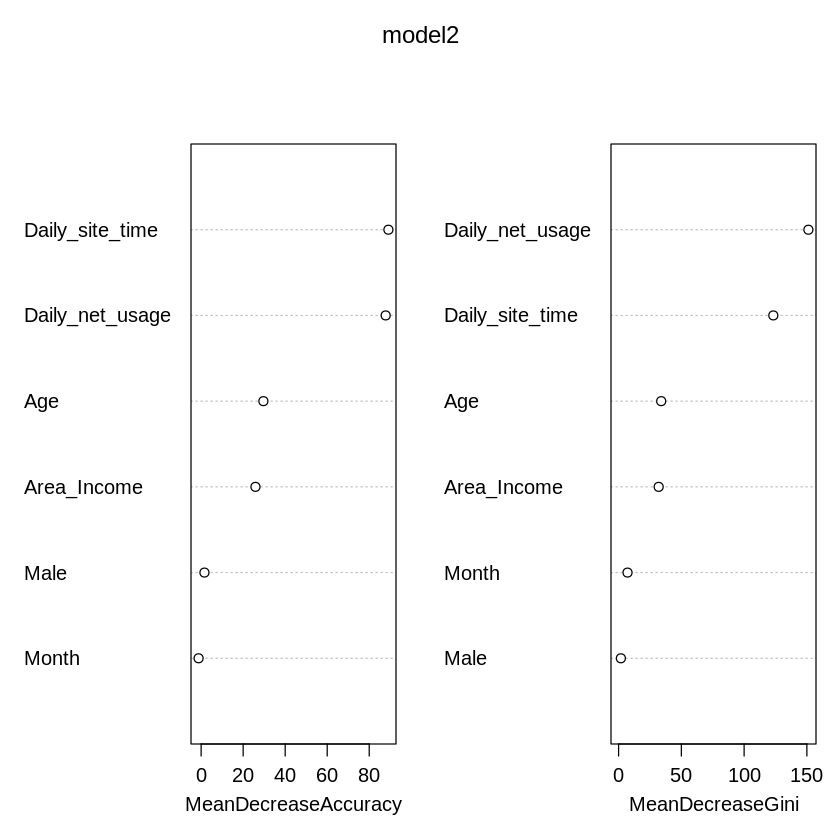

In [162]:
# To check important variables
importance(model2)        
varImpPlot(model2) 

Now, we will use ‘for’ loop and check for different values of mtry.

[1] 0.9600000 0.9566667

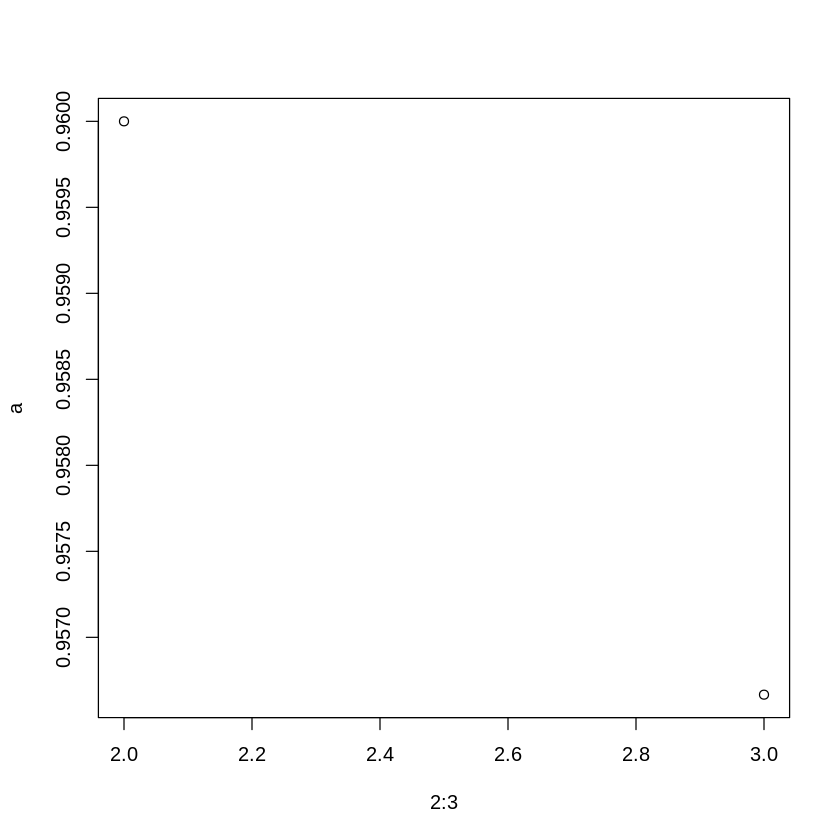

In [183]:
# Using For loop to identify the right mtry for model
a=c()
i=0.05
for (i in 1:3) {
  model3 <- randomForest(Clicked_on_Ad ~ ., data = TrainSet, ntree = 500, mtry = i, importance = TRUE)
  predValid <- predict(model3, ValidSet, type = "class")
  a[i-0.2] = mean(predValid == ValidSet$Clicked_on_Ad)
}

a

plot(2:3,a)

The model has the highest accurracy when mtry is 2

##  Challenging the model Using Decision Trees

Now, we have seen the implementation of Random Forest and understood the importance of the model. Let’s compare this model with decision tree and see how decision trees fare in comparison to random forest.

In [184]:
# Compare with Decision Tree

install.packages("rpart")
install.packages("caret")
install.packages("e1071")

library(rpart)
library(caret)
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice



In [185]:
# We will compare model 1 of Random Forest with Decision Tree model

model_dt = train(Clicked_on_Ad ~ ., data = TrainSet, method = "rpart")
model_dt_1 = predict(model_dt, data = TrainSet)
table(model_dt_1, TrainSet$Clicked_on_Ad)

mean(model_dt_1 == TrainSet$Clicked_on_Ad)

          
model_dt_1   0   1
         0 318  13
         1  29 340

[1] 0.94

On the training dataset, the accuracy is around 94.0% and there are 42 misclassiffied data points. Now, look at the validation dataset.

In [186]:
# Running on Validation Set
model_dt_vs = predict(model_dt, newdata = ValidSet)
table(model_dt_vs, ValidSet$Clicked_on_Ad)

mean(model_dt_vs == ValidSet$Clicked_on_Ad)

           
model_dt_vs   0   1
          0 137   7
          1  16 140

[1] 0.9233333

The accuracy on validation dataset has decreased further to 92.3%.

The above comparison shows the true power of ensembling and the importance of using Random Forest over Decision Trees. Though Random Forest comes up with its own inherent limitations (in terms of number of factor levels a categorical variable can have), but it still is one of the best models that can be used for classification. It is easy to use and tune as compared to some of the other complex models, and still provides us good level of accuracy in the business scenario. You can also compare Random Forest with other models and see how it fares in comparison to other techniques. Happy Random Foresting!!

# Conclusion and Recommendation

1. From the above analysis we  have found out that the click  through rate is affected by age so older people clicked on the ad more often than the younger people 

 From that  I can recomend that the campaign be targeted towards older people 

2. The less time someone spends on the internet and on the site the more likely  they are to click through the ad

 From that I could recomend that the site be customised in a way that people dont spend much time on it 

 i.e The call to action button can be made bigger, it can be made to twinkle or shake to grabb attention quicker 

 alternatively the content on the site could be summarised so that any visitor does not spend so much time reading through before they can reach the actual place to click the ad

3. Some tag lines are not being clicked so they should be deleted or re-written 
 The tag lines with more clicks should have their budgets increased so that we have moreclicks and if this was a conversion campaign , more clicks relates tomore sales 

 The unclicked tag lines should just be deleted and their budget cut , or reduced because they are spending money but not delivering

4. From the above we can also see that the least age that identifies with any of the above tag line was 28 yet our dataset had ages from 19 . So for the click through rate to increase . Tag lines can be crafted to apeal to this younger demography or the targeting can be done so that the least age targeted in the campaighn can be 28

5. There are 22 countries where the ad was ran and did not get any click. We could remove those 22 countries from our target countries and target the countries where the click through rate was high 

6. There are so many , more than 100 no click cities . We should look into these drop the no click  countries and if we still have no click cities we should drop them too and not spend any money advertising in these cities